<div class="pull-left">

Katharina Alefs, Joāo dos Santos Marques

DBM2: Data Mining

</div>

<div class="pull-right">

<h4> 20.12.2021 </h4>

</div>

## Data Mining Project: Classification

This notebook explains how we approached the **Classification** part of the Data Mining project using Kestrokes Authentification.


**Data:**

We found a dataset from Kaggle on Keystrokes Dynamics which was relatively clean and in a good format. This dataset by Carnegie Mellon University provides keystroke timing information from 51 American subjects each typing the password '.tie5Roanl' for 400 times within 8 sessions à 50 repetitions each. 

The columns of the dataset contain the following information: 
- 'Hold' (H): timestamp key was held down
- 'Down-Down' (DD): time between pressing down one key and its subsequent key
- 'Up-Down' (UD): time releasing a key and pressing the following one.

Given that these time periods are linearly dependent on each other, as H time and UD time add up to DD time, we preprocessed the dataset by dropping the DD columns whilst preserving the same degree of detail. We ensured that our data was free of null entries and checked for redundancy. 

In the following step we gained first knowledge of the dataset by applying Exploratory Data Analysis methods, such as creating boxplots for Hold and Up-Down times. For a first impression of the data, we also generated descriptive statistics.

In addition to the dataset we also inserted our own keystrokes in order to be able to answer and analyze the research questions. We only collected the keystroke timestamps that correspond to our needs (H, UD). 

**Methods:**

We implemented the <strong>Naïve Bayesian Classifier</strong> which is based on applying Bayes' theorem with strong independence assumptions between the features. It is a highly scalable technique for constructing classifiers. The ‘naïve’ version assumes that each input variable is independent. 

Additionally, we used the <strong>Decision Tree</strong> algorithm, as it has the ability to capture descriptive decision-making information from the provided data. The Decision Tree algorithm divides the data by defining hierarchical splitting conditions, breaking the universe of classes into subgroups until a final decision is being taken in a leaf node. One of the biggest advantages of the algorithm is that it is easily interpretable.

In [63]:
#Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from six import StringIO
from PIL import Image
import math
from sklearn.naive_bayes import GaussianNB

In [64]:
# Preprocess the data by dropping DD columns, as well as renaming subject rows

def subject_to_int(subjectDesc):
    onlyDigits = ''.join(char for char in subjectDesc if char.isdigit())
    res = int(onlyDigits)
    return res


def drop_column(dff):
    for column in dff:
        if "DD" in column:
            dff = dff.drop(column, 1)
    return dff

def preprocess(file):
    df = pd.read_csv(file)
    df = drop_column(df)
    df['subject'] = df['subject'].apply(subject_to_int)
    return df

In [65]:
#preprocessed data
df = preprocess('basedata.csv')

In [66]:
df.shape

(20400, 24)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          20400 non-null  int64  
 1   sessionIndex     20400 non-null  int64  
 2   rep              20400 non-null  int64  
 3   H.period         20400 non-null  float64
 4   UD.period.t      20400 non-null  float64
 5   H.t              20400 non-null  float64
 6   UD.t.i           20400 non-null  float64
 7   H.i              20400 non-null  float64
 8   UD.i.e           20400 non-null  float64
 9   H.e              20400 non-null  float64
 10  UD.e.five        20400 non-null  float64
 11  H.five           20400 non-null  float64
 12  UD.five.Shift.r  20400 non-null  float64
 13  H.Shift.r        20400 non-null  float64
 14  UD.Shift.r.o     20400 non-null  float64
 15  H.o              20400 non-null  float64
 16  UD.o.a           20400 non-null  float64
 17  H.a         

In [68]:
df.isnull().any()

subject            False
sessionIndex       False
rep                False
H.period           False
UD.period.t        False
H.t                False
UD.t.i             False
H.i                False
UD.i.e             False
H.e                False
UD.e.five          False
H.five             False
UD.five.Shift.r    False
H.Shift.r          False
UD.Shift.r.o       False
H.o                False
UD.o.a             False
H.a                False
UD.a.n             False
H.n                False
UD.n.l             False
H.l                False
UD.l.Return        False
H.Return           False
dtype: bool

In [69]:
data_statistics = df.drop(['subject', 'rep', 'sessionIndex'], axis=1)
data_statistics.describe()

,H.period,UD.period.t,H.t,UD.t.i,H.i,UD.i.e,H.e,UD.e.five,H.five,UD.five.Shift.r,...,UD.Shift.r.o,H.o,UD.o.a,H.a,UD.a.n,H.n,UD.n.l,H.l,UD.l.Return,H.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,...,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,0.093379,0.170769,0.085727,0.083358,0.081565,0.077806,0.089138,0.288295,0.076904,0.361983,...,0.154984,0.088354,0.068577,0.106259,0.044411,0.089899,0.112731,0.095589,0.226259,0.088306
std,0.029626,0.226836,0.027424,0.125755,0.026887,0.228512,0.030635,0.266695,0.021746,0.260886,...,0.181619,0.026427,0.108509,0.038828,0.105197,0.030738,0.159571,0.028348,0.230759,0.027452
min,0.001400,-0.235800,0.009300,-0.162100,0.003200,-0.160000,0.002100,-0.150500,0.001400,0.085600,...,-0.086500,0.006900,-0.228700,0.004000,-0.235500,0.003700,-0.175800,0.003700,-0.124500,0.002900
25%,0.074400,0.049800,0.066000,0.027200,0.062000,0.007400,0.068600,0.133200,0.061000,0.229675,...,0.054700,0.071500,0.017000,0.082100,-0.009000,0.067300,0.023500,0.077400,0.114100,0.069900
50%,0.089500,0.108700,0.081000,0.057800,0.077100,0.041200,0.083400,0.200400,0.074200,0.302000,...,0.102200,0.086300,0.044400,0.101900,0.022700,0.085300,0.095500,0.093700,0.160300,0.085500
75%,0.107900,0.212400,0.099800,0.096400,0.096900,0.093400,0.102700,0.369400,0.090600,0.408900,...,0.191000,0.101900,0.080300,0.122300,0.068900,0.107900,0.145700,0.111100,0.255100,0.103700
max,0.376100,12.451700,0.241100,4.799900,0.331200,25.915800,0.325400,4.882700,0.198900,8.290800,...,4.012000,0.687200,2.815200,2.035300,2.524200,0.357700,3.978200,0.340700,5.836400,0.265100


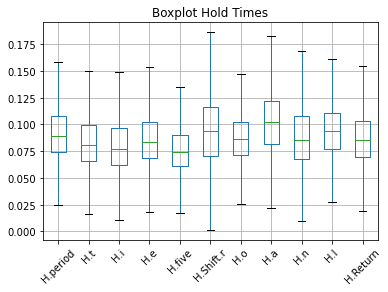

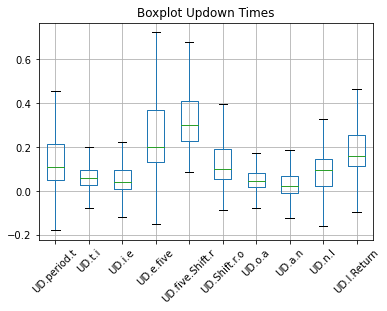

In [70]:
# Create Boxplots for hold and updown times
hold_times = df.drop(['subject', 'rep', 'sessionIndex', 'UD.period.t', 'UD.five.Shift.r','UD.t.i', 'UD.e.five', 'UD.Shift.r.o', 'UD.o.a', 'UD.n.l', 'UD.i.e', 'UD.a.n', 'UD.l.Return'],axis=1)
boxplot_hold = hold_times.boxplot(showfliers=False)
boxplot_hold.set_title('Boxplot Hold Times')
plt.xticks(rotation=45)
plt.show()

updown_times = df.drop(['subject', 'rep', 'sessionIndex', 'H.period', 'H.t', 'H.i', 'H.e', 'H.five', 'H.Shift.r', 'H.o', 'H.a', 'H.n', 'H.l', 'H.Return'],axis=1)
boxplot_updown = updown_times.boxplot(showfliers=False)
boxplot_updown.set_title('Boxplot Updown Times')
plt.xticks(rotation=45)
plt.show()

## 1. Naive Bayes Classifier

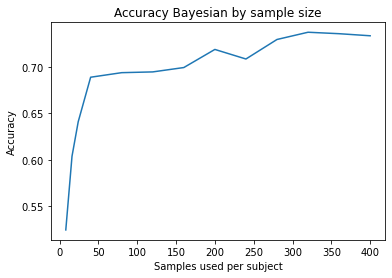

In [71]:
# Implement Bayesian (Gaussian) Classifier

accuraciesGaussian = list([])
sampleCountGaussian = []
reps = [1,2,3,5,10,15,20,25,30,35,40,45,50]
rep_count = 50


def gaussian():
    for element in reps:
        curDF = df[df['rep'] <= element]
        #lowering the amount of subjects
        curDF = curDF[curDF['subject'] < 60]
        subject_vector = curDF["subject"]
        subject_vector = np.array(subject_vector)

        del curDF['subject']
        del curDF['rep']
        del curDF['sessionIndex']
        samples = np.array(curDF)

        #splitting train and test set
        X_train, X_test, y_train, y_test = train_test_split(samples, subject_vector, test_size=0.2,random_state=109)

        #Feeding data into the naive bayesian classifier
        model = GaussianNB()
        model.fit(X_train, y_train)

        #testing the model
        #testing protocol for methodology
        test_vector = np.random.randint(0, 56, 3672)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)

        accuraciesGaussian.append(accuracy)
        sampleCountGaussian.append(element*8)
    return accuraciesGaussian,sampleCountGaussian


gaussian()

# Plot accuracy per samples per user

plt.plot(sampleCountGaussian, accuraciesGaussian)
plt.xlabel("Samples used per subject")
plt.ylabel("Accuracy")
plt.title('Accuracy Bayesian by sample size')
plt.show()

## 2. Decision Tree

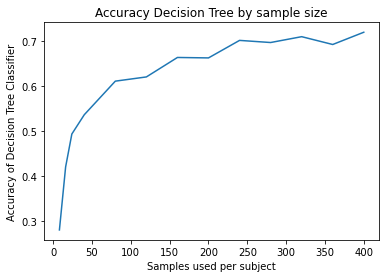

In [72]:
# Implement Decision Tree Classifier

reps = [1,2,3,5,10,15,20,25,30,35,40,45,50]
rep_count = 50
accuracies = list([])
sampleCount = []

for element in reps:
    curDF = df[df['rep'] <= element]
    #lowering the amount of subjects
    curDF = curDF[curDF['subject'] < 60]
    subject_vector = curDF["subject"]
    subject_vector = np.array(subject_vector)
    del curDF['subject']
    del curDF['rep']
    del curDF['sessionIndex']
    ind_vars = np.array(curDF)
    #split train and test set
    X_train, X_test, y_train, y_test = train_test_split(ind_vars, subject_vector, test_size=0.2,random_state=103)

    # Create Decision Tree classifier object
    clf = DecisionTreeClassifier()

    # Train Decision Tree Classifier
    clf = clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    sampleCount.append(element*8)

dot_data = StringIO()
feature_cols = ["H.period","UD.period.t","H.t","UD.t.i","H.i","UD.i.e","H.e","UD.e.five","H.five","UD.five.Shift.r","H.Shift.r", "UD.Shift.r.o","H.o", "UD.o.a" ,"H.a","UD.a.n","H.n", "UD.n.l","H.l","UD.l.Return","H.Return"]

# we computed the decision tree before because it takes quite some time
img = Image.open('dec_tree_keystrokes_depth4.png')
img.show()

# visualize accuracy per train data supplied
plt.plot(sampleCount, accuracies)
plt.xlabel("Samples used per subject")
plt.ylabel("Accuracy of Decision Tree Classifier")
plt.title('Accuracy Decision Tree by sample size')
plt.show()



## Results:

Both models surpass an accuracy of 70%.

Model  | Accuracy 500 test samples
-------------------|------------------
Bayesian Classifier | 73.3%
Decision Tree | 71.8%

Overall, depending on the sample size, Bayesian obtained the highest accuracy. For an input size smaller than 100, Bayesian proved as the most precise classification method. The Decision Tree needs a bigger sample size compared with Bayesian in order to obtain the same results. 
It seems that after utilizing 250 samples, the Bayesian Classifier can no longer accomplish higher accuracy by utilizing more data.

For the Decision Tree model it seems like even more data could have contributed to even higher accuracy. However, as we were limited by the data set we had available, we could not verify that hypothesis.
Under data scarcity the Naïve Bayesian Classifier is the better choice. 

**Can users be verified/identified by analyzing their keystroke dynamics?**

Our results have confirmed this thesis. Given that substantial training data is available (>25 per subject), keystroke dynamics could be analyzed to authenticate a user. Of course, the accuracy i.e. of the NBC is only at ~68% accuracy for this amount of data. However, it must be considered that instead of identifying the user in a group of 50, authentication only means validating the assumption that the typing person is indeed said user. 
For this, we would argue that the explanatory power of the models are sufficient. 

However, in order to identify a user via analyzing keystroke dynamics, the attained accuracies might not be enough, especially as there would be several thousand users in a real world example.